# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

# Importing the DataSet

In [2]:
data = pd.read_excel('Folds5x2_pp.xlsx')
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# Getting X and Y

In [3]:
#y is the target variable
y = data['PE']
print(y)
#X are the Predictors
X = data.drop(['PE'], axis = 1)
print(X)

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64
         AT      V       AP     RH
0     14.96  41.76  1024.07  73.17
1     25.18  62.96  1020.04  59.08
2      5.11  39.40  1012.16  92.14
3     20.86  57.32  1010.24  76.64
4     10.82  37.50  1009.23  96.62
...     ...    ...      ...    ...
9563  16.65  49.69  1014.01  91.00
9564  13.19  39.18  1023.67  66.78
9565  31.32  74.33  1012.92  36.48
9566  24.48  69.45  1013.86  62.39
9567  21.60  62.52  1017.23  67.87

[9568 rows x 4 columns]


# Split the data in the training and test set

In [4]:
from sklearn.model_selection import train_test_split
#Split the dataset 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Train The model on the Training Set

In [5]:
from sklearn.linear_model import LinearRegression
#Instantiating Linear Regression
ligreg = LinearRegression()
#Fitting the Model
ligreg.fit(X_train, y_train)

LinearRegression()

# Predict the Test Results

In [6]:
#Getting the X_test Predicted Values
y_hat_test = ligreg.predict(X_test)
print(y_hat_test)

[431.40245096 458.61474119 462.81967423 ... 432.47380825 436.16417243
 439.00714594]


# Evaluate the Model

In [7]:
from sklearn.metrics import r2_score
#Checking the r2 score for the model
r2_score(y_test, y_hat_test)

0.9304112159477682

# Plot the Results

Text(0.5, 1.0, 'Actual Vs Predicted')

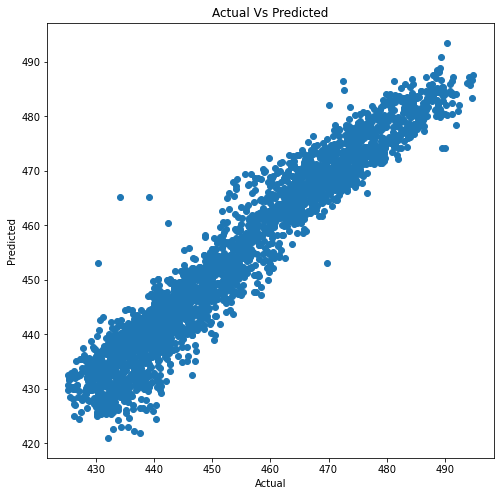

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

#Plotting the test results (actual vs predicted)
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_hat_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs Predicted')

# Predicted Values

In [9]:
#Getting the actual, predicted and the difference
pred_y_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat_test, 'Difference':( y_test - y_hat_test)})
pred_y_df[0:20]

,Actual,Predicted,Difference
4834,431.23,431.402451,-0.172451
1768,460.01,458.614741,1.395259
2819,461.14,462.819674,-1.679674
7779,445.90,448.601237,-2.701237
7065,451.29,457.879479,-6.589479
9482,432.68,429.676856,3.003144
9,477.50,473.017115,4.482885
4986,459.68,456.532373,3.147627
6168,477.50,474.342524,3.157476
3664,444.99,446.364396,-1.374396
